# Homework Assignment 2 

## Risk Graph

### (Notebook 2 of 2)



### <p style="text-align: right;"> &#9989; Rithvik Burri</p>
### <p style="text-align: right;"> &#9989; burririt</p>

## Assignment Overview

In this assignment, we'll explore graphs using the board game Risk as our practical example. Risk is a strategy game played on a world map where territories are connected to their neighbors. This makes it a perfect candidate for graph representation and analysis.

### Learning Objectives

- Implement a graph representation of a real-world game board
- practice using networkx
- do some research
- visualize graph data using NetworkX

The assignment is split into two notebooks:
- Notebook 1 of 2 is worth **14 + 33 + 3 = 51 points** 
- Notebook 2 of 2 is worth **1+ 42 + 1 = 44 points** 
for a total of **95 points**. Point values for each part are included in the section headers and question prompts.

**This assignment is due at 11:59 pm on Friday, March 21st.** It should be uploaded into the "Homework Assignments" submission folder for Homework #2 on D2L.  Submission instructions can be found at the end of the notebook. **You must also fill out a survey regarding this assignment.** The link to this survey can also be found at the end of the notebook.

---
## &#128721; STOP
**Pause to add this file and commit your changes to your Git repository! (1 points)**

---

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

---
<a id="part3"></a>
[Back to ToC](#toc)

## Part 3: Creating the Risk Game Graph (42 points)


![image](https://cf.geekdo-images.com/JM6hEipDwIByZKEIK9Dgeg__imagepage/img/OEl2gaJbUxdvIv6tNPzDsQyLUtQ=/fit-in/900x600/filters:no_upscale():strip_icc()/pic365731.jpg)


&#9989; **Question 3.1 (5 points)**: Create a dictionary that defines the territories in Risk, organized by continents. Each territory should include its neighboring territories. Use the image above for completing the code below

In [2]:
# Define the Risk board territories and their connections
risk_territories = {
    'North America': {
        'Alaska': ['Northwest Territory', 'Alberta', 'Kamchatka'],
        'Northwest Territory': ['Alaska', 'Alberta', 'Greenland'],
        'Greenland': ['Northwest Territory', 'Ontario', 'Quebec', 'Iceland'],
        'Alberta': ['Alaska', 'Northwest Territory', 'Ontario', 'Western United States'],
        'Ontario': ['Alberta', 'Northwest Territory', 'Greenland', 'Quebec', 'Western United States', 'Eastern United States'],
        'Quebec': ['Ontario', 'Greenland', 'Eastern United States'],
        'Western United States': ['Alberta', 'Ontario', 'Eastern United States', 'Central America'],
        'Eastern United States': ['Western United States', 'Ontario', 'Quebec', 'Central America'],
        'Central America': ['Western United States', 'Eastern United States', 'Venezuela']
    },
    'South America': {
        'Venezuela': ['Central America', 'Brazil', 'Peru'],
        'Brazil': ['Venezuela', 'Peru', 'Argentina', 'North Africa'],
        'Peru': ['Venezuela', 'Brazil', 'Argentina'],
        'Argentina': ['Peru', 'Brazil']
    },
    'Europe': {
        'Iceland': ['Greenland', 'Great Britain', 'Scandinavia'],
        'Great Britain': ['Iceland', 'Scandinavia', 'Northern Europe', 'Western Europe'],
        'Scandinavia': ['Iceland', 'Great Britain', 'Northern Europe', 'Ukraine'],
        'Northern Europe': ['Great Britain', 'Scandinavia', 'Ukraine', 'Western Europe', 'Southern Europe'],
        'Western Europe': ['Great Britain', 'Northern Europe', 'Southern Europe', 'North Africa'],
        'Southern Europe': ['Western Europe', 'Northern Europe', 'Ukraine', 'Egypt', 'North Africa'],
        'Ukraine': ['Scandinavia', 'Northern Europe', 'Southern Europe', 'Afghanistan', 'Ural', 'Middle East']
    },
    'Africa': {
        'North Africa': ['Western Europe', 'Southern Europe', 'Brazil', 'Egypt', 'East Africa', 'Congo'],
        'Egypt': ['Southern Europe', 'North Africa', 'East Africa', 'Middle East'],
        'East Africa': ['Egypt', 'North Africa', 'Congo', 'South Africa', 'Madagascar', 'Middle East'],
        'Congo': ['North Africa', 'East Africa', 'South Africa'],
        'South Africa': ['Congo', 'East Africa', 'Madagascar'],
        'Madagascar': ['East Africa', 'South Africa']
    },
    'Asia': {
        'Ural': ['Ukraine', 'Siberia', 'China', 'Afghanistan'],
        'Siberia': ['Ural', 'China', 'Mongolia', 'Irkutsk', 'Yakutsk'],
        'Yakutsk': ['Siberia', 'Kamchatka', 'Irkutsk'],
        'Kamchatka': ['Yakutsk', 'Siberia', 'Alaska', 'Japan', 'Irkutsk'],
        'Irkutsk': ['Siberia', 'Yakutsk', 'Kamchatka', 'Mongolia'],
        'Mongolia': ['Siberia', 'Irkutsk', 'Kamchatka', 'Japan', 'China'],
        'Japan': ['Kamchatka', 'Mongolia'],
        'Afghanistan': ['Ukraine', 'Ural', 'China', 'Middle East', 'India'],
        'China': ['Ural', 'Siberia', 'Mongolia', 'Afghanistan', 'India', 'Siam'],
        'Middle East': ['Southern Europe', 'Ukraine', 'Afghanistan', 'India', 'Egypt', 'East Africa'],
        'India': ['Afghanistan', 'China', 'Middle East', 'Siam'],
        'Siam': ['China', 'India', 'Indonesia']
    },
    'Australia': {
        'Indonesia': ['Siam', 'New Guinea', 'Western Australia'],
        'New Guinea': ['Indonesia', 'Western Australia', 'Eastern Australia'],
        'Western Australia': ['Indonesia', 'New Guinea', 'Eastern Australia'],
        'Eastern Australia': ['New Guinea', 'Western Australia']
    }
}

### Graph Creation

&#9989; **Question 3.2 (7 points)**: Create a NetworkX graph object from the territory definitions. The territories are the nodes of the graph. Implement a function that builds the graph and adds appropriate attributes for continents. _Hint:_ Look up the documentation of `add_node`, what are the possible inputs? Don't forget to connect each territory to its neighbors. Make sure to add plenty of comments in your code.

In [5]:
def create_risk_graph(territories):
    """
    Create a NetworkX graph from the Risk territory definitions.
    
    Parameters:
        territories (dict): Dictionary containing territory and connection information
        
    Returns:
        G (nx.Graph): NetworkX graph representing the Risk board
    """
    # Initialize an empty undirected graph
    G = nx.Graph()
    
    # Iterate through each continent and its territories
    for continent, territory_dict in territories.items():
        for territory, neighbors in territory_dict.items():
            # Add the territory as a node with a 'continent' attribute
            G.add_node(territory, continent=continent)
            
            # Add edges between the territory and its neighbors
            for neighbor in neighbors:
                G.add_edge(territory, neighbor)
    
    return G

# Create the graph
G = create_risk_graph(risk_territories)

### Graph Visualization

&#9989; **Question 3.3 (4 points)**: Create a visualization of the Risk board graph. You can use AI to help you with this. The function below should:

- make a plot of the risk graph.
- color nodes by continent
- allow the user to choose a type of layout. _Hint:_ search networkx documentation for the possible layout. Min 5 layouts should be available.
- print the name of each territory on the respective node
- make a legend for the graph 
- have very descriptive comments 
- increase the size of each node from the default value  
- increase the font size of label from the default value

Choose a layout for the graph:
1. spring
2. circular
3. shell
4. kamada_kawai
5. spectral


Enter the number of your choice:  4


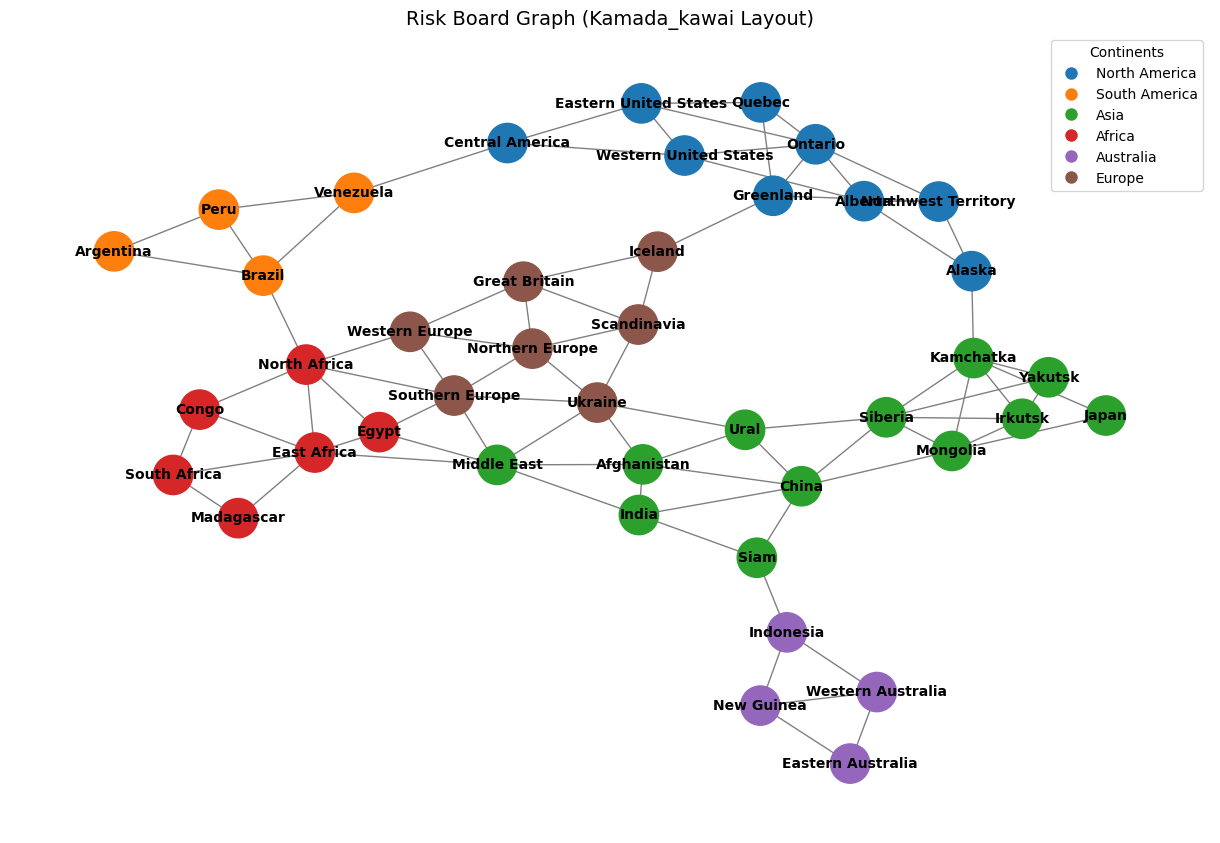

In [23]:
# OpenAI. 2025. "ChatGPT." Accessed March 13, 2025. https://chat.openai.com.
# Discovered through OpenAI that using the draw function provided a more efficient approach compared to my initial implementation.

def visualize_risk_graph(G):
    """
    Create a visualization of the Risk board graph with continents colored differently.
    
    Parameters:
        G (nx.Graph): NetworkX graph of the Risk board
    """
    # Define 5 layout options for the user to choose from
    layout_options = {
        'spring': nx.spring_layout,
        'circular': nx.circular_layout,
        'shell': nx.shell_layout,
        'kamada_kawai': nx.kamada_kawai_layout,
        'spectral': nx.spectral_layout
    }
    
    # Ask the user to choose a layout
    print("Choose a layout for the graph:")
    for i, layout_name in enumerate(layout_options.keys()):
        print(f"{i + 1}. {layout_name}")
    choice = int(input("Enter the number of your choice: ")) - 1
    selected_layout = list(layout_options.keys())[choice]
    
    # Generate positions for nodes using the selected layout
    pos = layout_options[selected_layout](G)
    
    # Get continent attributes for each node
    continent_attr = nx.get_node_attributes(G, 'continent')
    
    # Assign a unique color to each continent using a colormap
    continents = set(continent_attr.values())
    color_map = plt.cm.tab10  # Use a colormap with distinct colors
    
    # Map each node to its continent's color
    node_colors = [color_map(list(continents).index(continent_attr[node])) for node in G.nodes]
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(
        G, 
        pos, 
        node_color=node_colors,  # Color nodes by continent
        with_labels=True,       # Print territory names on nodes
        node_size=800,          # Increase node size
        font_size=10,           # Increase font size
        font_weight='bold',     # Make labels bold
        edge_color='gray'       # Set edge color
    )
    
    # Create a legend for continents
    legend_labels = {
        continent: plt.Line2D(
            [0], [0], 
            marker='o', 
            color='w', 
            markersize=10, 
            markerfacecolor=color_map(i)
        )
        for i, continent in enumerate(continents)
    }
    plt.legend(
        legend_labels.values(), 
        legend_labels.keys(), 
        title="Continents", 
        loc="upper right"
    )
    
    # Add a title and hide the axis
    plt.title(f"Risk Board Graph ({selected_layout.capitalize()} Layout)", fontsize=14)
    plt.axis('off')  # Hide the axis
    plt.show()

# Visualize the graph
visualize_risk_graph(G)

&#9989; **Question 3.4 (26 points)**: Answer the following questions based on the Risk board graph visualization. Each answer should have a minimum of 1-2 sentences and snippet of the code that supports your answer. You must explain what each function in the code snippet does. 

All answers should be in the same markdown cell. 

The code snippet should be properly displayed using code markdown. 

1. Which layout type provides the best visualization of the continent-based clustering in the Risk board graph?
    - Explain the rationale behind your choice of layout.
2. Do a little research and explain what the Kamada-Kawai layout does? Make sure to cite your sources.
3. Which part of the code is used to assign the color of each node based on its continent?
4. How did you make the legend? Explain any non-obvious part of the code.
5. What colormap did you choose for the continents and how did you import the colormap? 
6. How did you set the node size and font size in the visualization?
7. How did you print the labels for the nodes? 

✎ 
1. The spring layout provides the best visualization of continent-based clustering because it positions nodes based on their connections, naturally grouping territories within the same continent closer together.

In [25]:
# pos = nx.spring_layout(G)

2. The Kamada-Kawai layout positions nodes based on a cost function that minimizes the difference between the graph's shortest path distances and the Euclidean distances in the layout. It is useful for visualizing small to medium-sized graphs with clear structural relationships.

NetworkX Developers. n.d. "networkx.drawing.layout.kamada_kawai_layout." NetworkX. Accessed March 14, 2025. https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.kamada_kawai_layout.html.

In [26]:
# pos = nx.kamada_kawai_layout(G)

3. The colors are assigned using a list comprehension that maps each node to its continent's color. This code maps each node to a color based on its continent using the color_map and the node's continent attribute.

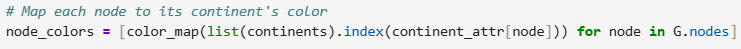

4. The legend is created using plt.Line2D to represent each continent with a colored marker. plt.Line2D creates a custom legend entry for each continent, and plt.legend adds it to the plot.

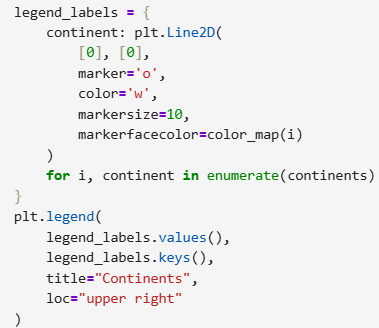

5. The tab10 colormap from matplotlib.pyplot was used to assign distinct colors to continents. plt.cm.tab10 provides 10 distinct colors, which is sufficient for the continents in Risk.

6. The node_size and font_size parameters in nx.draw were used to increase the size of nodes and labels. node_size=800 increases the node size, and font_size=10 increases the label size.

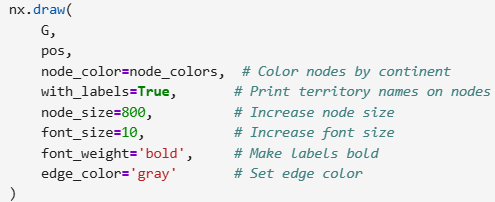

---
## &#128721; STOP
**Pause to commit your changes to your Git repository! (1 points)**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 3**", no need to push the changes to GitHub yet, but you can if you want.

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

If you like, you can upload this file to D2L for a record. Nevertheless, **we will grade the copy on GitHub**. 


&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University